# Ingest images

In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import bionty as bt
import lamindb as db
from nbproject import header

header()

id,nlZQDJXFnUSN
time_init,2022-07-12 17:24
time_run,2022-07-12 17:24
version,draft
dependency,bionty==0.0.6+17.g0499eed lamindb==0.0.9 matplotlib==3.5.2 nbproject==0.2.0 scanpy==1.8.2


## A spatial dataset

Here we have a spatial gene expression dataset measured using [Visium](https://www.10xgenomics.com/products/spatial-gene-expression) from [Suo22](https://developmental.cellatlas.io/fetal-immune).

This dataset contains two parts:

1. a high-res image of a slice of fetal liver

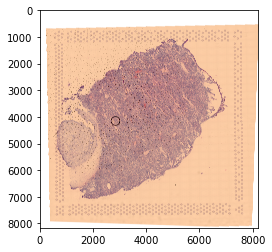

In [2]:
img_path = "/Users/sunnysun/Downloads/sandbox/suo22/LI_img/F121_LP1_4LIV.tiff"
img = plt.imread(img_path)
plt.imshow(img)
plt.show()

2. a single cell expression dataset in .h5ad

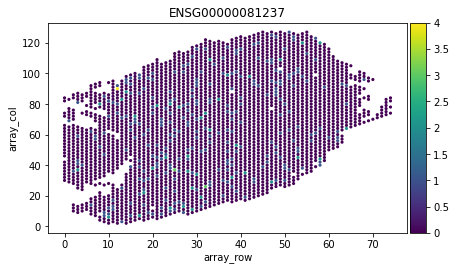

In [3]:
adata = sc.read("/Users/sunnysun/Downloads/sandbox/suo22/Visium10X_data_LI.h5ad")
# subset to the same image
adata = adata[adata.obs["img_id"] == "F121_LP1_4LIV"].copy()

# plot where CD45+ leukocytes are in the slice
sc.pl.scatter(adata, "array_row", "array_col", color="ENSG00000081237")

Here we perform curation of the gene identifiers using bionty (see [here](https://lamin.ai/docs/bionty/tutorials/curate) for more details).

In [4]:
adata.var.head()

,feature_types,genome,SYMBOL,mt
ENSEMBL,,,,
ENSG00000000003,Gene Expression,GRCh38,TSPAN6,False
ENSG00000000005,Gene Expression,GRCh38,TNMD,False
ENSG00000000419,Gene Expression,GRCh38,DPM1,False
ENSG00000000457,Gene Expression,GRCh38,SCYL3,False
ENSG00000000460,Gene Expression,GRCh38,C1orf112,False


In [5]:
curated_var = bt.Gene(id="ensembl.gene_id").curate(adata.var)
adata.var = curated_var

curated_var.head()

355 terms (2.5%) are not mappable.


,feature_types,genome,SYMBOL,mt,orig_index,__curated__
ENSEMBL,,,,,,
ENSG00000000003,Gene Expression,GRCh38,TSPAN6,False,ENSG00000000003,True
ENSG00000000005,Gene Expression,GRCh38,TNMD,False,ENSG00000000005,True
ENSG00000000419,Gene Expression,GRCh38,DPM1,False,ENSG00000000419,True
ENSG00000000457,Gene Expression,GRCh38,SCYL3,False,ENSG00000000457,True
ENSG00000000460,Gene Expression,GRCh38,C1orf112,False,ENSG00000000460,True


## Ingest the image into LaminDB

In [6]:
! lndb init --storage $HOME/mydata

Using instance: /Users/sunnysun/mydata/mydata.lndb


In [7]:
! lndb login --email "xiaoji.sun515@gmail.com"

In [8]:
db.do.ingest(img_path, i_confirm_i_saved=True, integrity=True)

Added file F121_LP1_4LIV.tiff (ylhKkHmQth30PUm0Uc9Q) from notebook 'Ingest images' (not initialized) by user xiaoji.sun515@gmail.com (BjExb4ik).
Cell numbers increase at increments of 1: Awesome!


ValueError: The nbproject version cannot be cast to integer. Please pass a version string.